In [1]:
import pandas as pd
from xgboost import XGBClassifier, cv
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import numpy as np

SEED=0

# Load the dataset
- Load data from excel sheet
- Set X (independent variables) and y (dependent variables) 

In [2]:
data_path = './data/master_4Mayhew.xlsx'
df = pd.read_excel(data_path)
df.set_index('SMILES', inplace=True)
y=df['label'] # labels, independent variables
X=df.drop(['label'], axis=1) # features, dependent variables

df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC=C2C(=C1)C(=O)C(C2=O)(O)O,10.191572,9.610016,0,0,16.402096,2.535251,4.795559,16.402096,1.261700,3.521954,...,60.186518,178.026609,9.369822,209,23,72,89,5.506944,2.750000,False
C(=C(F)F)(C(F)(F)F)C(F)(F)F,8.786807,9.354315,0,0,11.264384,2.394170,4.788340,11.264384,0.938699,3.353751,...,43.053817,199.987226,16.665602,179,16,58,63,8.347222,2.444444,False
C1=C(C=C(C(=C1[N+](=O)[O-])O)[N+](=O)[O-])[N+](=O)[O-],11.877237,11.411786,0,0,18.380381,2.411142,4.822284,18.380381,1.148774,3.664511,...,48.280750,228.997099,12.052479,408,25,78,90,8.277778,3.555556,False
CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,15.682318,12.964430,0,0,26.034025,2.456696,4.859289,26.034025,1.301701,3.935426,...,61.882766,284.071641,8.608232,726,36,106,126,6.277778,4.388889,False
C(C(C(F)(F)F)(F)Cl)(F)Cl,7.220990,7.794227,0,0,9.758256,2.380983,4.761966,9.758256,0.975826,3.172059,...,40.351995,201.937546,18.357959,108,15,48,54,7.236111,2.062500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCC(=O)OCC,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,130.099380,5.656495,108,7,32,31,4.361111,2.416667,True
C=CCSS(=O)CC=C,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,162.017307,8.527227,108,7,32,31,4.361111,2.416667,True
CCCC(=O)OCC(C)C,6.692130,6.855805,0,0,11.127090,2.052881,4.105762,11.127090,1.112709,3.123647,...,37.120200,144.115030,5.542886,143,8,38,37,5.222222,2.500000,True


# Split the dataset
- Split dataset into training and test set 
- Use equal proportions of odor/odorless class

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) # 70% training and 30% test
percentage_odorless = y_train.value_counts()[False]/y_train.shape[0]
percentage_odor = 1 - percentage_odorless
print(f"Total number molecules in training set: {y_train.shape[0]}")
print(f"Odor: {y_train.value_counts()[True]}")
print(f"Odorless: {y_train.value_counts()[False]}")

print(f"\nTotal number molecules in test set: {y_test.shape[0]}")
print(f"Odor: {y_test.value_counts()[True]}")
print(f"Odorless: {y_test.value_counts()[False]}")

print(f"\nPercentage odorless {y_test.value_counts()[False]/y_test.shape[0]}")

Total number molecules in training set: 692
Odor: 492
Odorless: 200

Total number molecules in test set: 173
Odor: 123
Odorless: 50

Percentage odorless 0.28901734104046245


In [4]:
percentage_odorless = y_train.value_counts()[False]/y_train.shape[0]
percentage_odor = 1 - percentage_odorless
print(f"Total number molecules in training set: {y_train.shape[0]}")
print(f"Odor: {y_train.value_counts()[True]}")
print(f"Odorless: {y_train.value_counts()[False]}")

print(f"\nTotal number molecules in test set: {y_test.shape[0]}")
print(f"Odor: {y_test.value_counts()[True]}")
print(f"Odorless: {y_test.value_counts()[False]}")

print(f"\nPercentage odorless {y_test.value_counts()[False]/y_test.shape[0]}")

Total number molecules in training set: 692
Odor: 492
Odorless: 200

Total number molecules in test set: 173
Odor: 123
Odorless: 50

Percentage odorless 0.28901734104046245


### Validation set

In [10]:
print("Number of training samples:", len(X_train_t))
print("Number of validation samples:", len(X_val))

Number of training samples: 1864
Number of validation samples: 30


# Test Model 

In [5]:
def test_model(model, y_test, X_test, verbose=True):
    y_pred=model.predict(X_test)
    y_pred_probs=model.predict_proba(X_test)[:,1]
    
    if verbose:
        print("ROC_AUC (TEST):",metrics.roc_auc_score(y_test, y_pred_probs))
        print("\n\nCLASSIFICATION REPORT:\n",metrics.classification_report(y_test, y_pred))
        
        if hasattr(model, 'feature_importances_') and hasattr(X_test, 'columns'):
            feature_imp = pd.Series(model.feature_importances_,index=X_test.columns.values).sort_values(ascending=False)
            top_20 = feature_imp.nlargest(20)
            sns.barplot(x=top_20, y=top_20.index)
            plt.xlabel('Descriptor Importance Score')
            plt.ylabel('Descriptor')
            plt.title("Top descriptors")
            plt.show()
        
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probs)  
        
        #create ROC curve
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    return metrics.roc_auc_score(y_test, y_pred_probs) 

def test_model_cross_val(model, y_test, X_test, k=5, verbose=True):
    roc_auc_nans = cross_val_score(model, X_test, y_test, cv=k, scoring='roc_auc')
    print(f"AVERAGE CV={k} ROC_AUC (TEST): {np.mean(roc_auc_nans)}")
    print(f"AVERAGE CV={k} STD (TEST): {np.std(roc_auc_nans)}")

# Handle Non Important Descriptors 

1. Remove values below threshold e.g. 0, any descriptors with 0 importance
2. Get the top N descriptors

In [6]:
def handle_importance(model, X_train, X_test=pd.DataFrame(), threshold=-1, n=-1, verbose=None):
    feature_imp = pd.Series(model.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
    if threshold >= 0:
        feature_imp = feature_imp[feature_imp > threshold]
    
    if n >= 0: 
        feature_imp = feature_imp.nlargest(n)
        
    if verbose: 
        print(feature_imp)
        
    X_train = X_train.loc[:, feature_imp.axes[0].tolist()]
    
    if not X_test.empty:
        X_test = X_test.loc[:, feature_imp.axes[0].tolist()]

    return X_train, X_test, model 

In [7]:
def optimiseImportance(model, X_tr, y_tr, k=5, verbose=True):
    
    imp_params = [
              {"threshold":-1, 'n':5}, 
              {"threshold":-1, 'n':10}, 
              {"threshold":-1, 'n':25}, 
              {"threshold":-1, 'n':50},
              {"threshold":-1, 'n':100}, 
              {"threshold":-1, 'n':200}, 
              {"threshold":-1, 'n':400}, 
              {"threshold":-1, 'n':800},
              {"threshold":-1, 'n':X_tr.shape[1]}]

    print(f"Cross validated importance experiment with k={k}")
    
    imp_df = pd.DataFrame(columns=['Most important N descriptors', 'Average ROC_AUC', 'Standard Deviation'])

    for imp_param in imp_params: 
        name = (f"Threshold:{imp_param['threshold']}N:{imp_param['n']}".replace("N:-1", '')).replace("Threshold:-1", '')
        
        if verbose:
            print(name)
        
        X_tr_temp , _, _ = handle_importance(model, 
                                            X_tr.copy(), 
                                            threshold=imp_param['threshold'], 
                                            n=imp_param['n'])
                
        roc_auc_nans = cross_val_score(model, X_tr_temp, y_tr, cv=k, scoring='roc_auc')
        
        imp_df = imp_df.append({'Most important N descriptors': imp_param['n'], 
                               'Average ROC_AUC':np.mean(roc_auc_nans), 
                               'Standard Deviation':np.std(roc_auc_nans)}, 
                                ignore_index = True)

    if verbose:
        fig = imp_df.plot(kind="bar", x="Most important N descriptors", y="Average ROC_AUC", yerr="Standard Deviation", title=f"ROC_AUC after filtering descriptors by importance CV={k}", legend=False)
        
        plt.ylim(0.85,1)
        
    return imp_df

# Handle NaNs


- You cannot have any missing values in the random forest model, you can in XGB
- You cannot have mismatched features between columns in the random forest model
- 3 options 
    1. Remove any columns with missing values 
    2. Remove columns above threshold percentange NaNs e.g. 60% NaNs. 
    3. Remove columns above threshold percentange NaNs e.g. 60% NaNs. Replace columns below threshold with missing values with the mean value.

In [8]:
def handleNaNs(X_tr, X_te, option=1, thresh=0.6): 
    if option == 1:
        nans =  X.columns[X.isna().any()].tolist()
        X_tr.drop(nans, inplace = True, axis=1)
        X_te.drop(nans, inplace = True, axis=1)
    else: 
        nans = X.isna().mean(axis=0)
        # set threshold for percentage nans before we drop 
        X_thresh = nans[nans >= thresh]
        X_tr.drop(X_thresh.index, 
          axis=1, 
          inplace=True)
        X_te.drop(X_thresh.index, 
          axis=1, 
          inplace=True)
        
        if option == 3: 
            X_tr.fillna(X_train.mean(), inplace=True) 
            X_te.fillna(X_test.mean(), inplace=True)
    
    return X_tr, X_te

In [12]:
def optimiseNaNs(model, X_train, X_test, y_train, y_test, option=2, k=5, verbose=True): 
    print(f"Cross validated missing values experiment with k={k}")
    
    percentages = [x/100 for x in range(0, 100, 10)] 
    nans_df = pd.DataFrame(columns=['Name', 'Average ROC_AUC', 'Standard Deviation'])

    for perc in percentages: 
        name = str(perc)
        if perc == 0:
            X_train_cv, _  = handleNaNs(X_train.copy(), X_test.copy(), option=1)
        else:
            X_train_cv, _  = handleNaNs(X_train.copy(), X_test.copy(), option=option, thresh=perc)

        roc_auc_nans = cross_val_score(model, X_train_cv, y_train, cv=k, scoring='roc_auc')
        
        nans_df = nans_df.append({'Name': name, 
                                   'Average ROC_AUC':np.mean(roc_auc_nans), 
                                   'Standard Deviation':np.std(roc_auc_nans)}, 
                                    ignore_index = True)

    if verbose:
        fig = nans_df.plot(kind="bar", x="Name", y="Average ROC_AUC", yerr="Standard Deviation", title=f"ROC_AUC after thresholding descriptors by % NaNs CV={k}", legend=False)
        plt.ylim(0.90,0.98)
        
    return nans_df

# Random Forest Model

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [10]:
# set random state to 0 to allow reproducible results
clf=RandomForestClassifier(random_state=SEED, max_depth=3, n_estimators=100) 

# For readability
y_train_rf = y_train
y_test_rf = y_test
X_train_rf = X_train
X_test_rf = X_test

## Handle NaNs RF

Cross validated missing values experiment with k=5


,Name,Average ROC_AUC,Standard Deviation
0,0.0,0.959503,0.005245
1,0.1,0.958996,0.004669
2,0.2,0.958280,0.005090
3,0.3,0.957317,0.002822
4,0.4,0.958269,0.004990
5,0.5,0.958327,0.005867
6,0.6,0.957921,0.005276
7,0.7,0.960264,0.005548
8,0.8,0.957063,0.004079
9,0.9,0.956145,0.005661


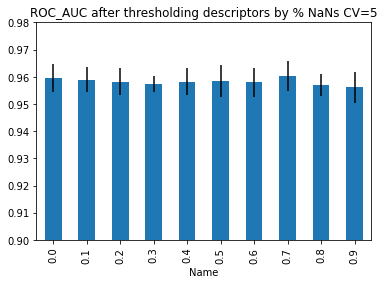

In [13]:
# choose optimal threshold for removing columns with NaNs
optimiseNaNs(clf, X_train_rf, X_test_rf, y_train_rf, y_test_rf, option=3)

let's just go with removing all the columns with missing values

In [14]:
X_train_rf, X_test_rf = handleNaNs(X_train.copy(), X_test.copy(), option=1)

In [15]:
clf.fit(X_train_rf, y_train_rf)
print("Validation performance of Random Forest after removing all columns with NaNs")
test_model_cross_val(clf, y_train_rf, X_train_rf, k=5, verbose=True)

Validation performance of Random Forest after removing all columns with NaNs
AVERAGE CV=5 ROC_AUC (TEST): 0.9595026798598228
AVERAGE CV=5 STD (TEST): 0.005245292016868568


## Using Importance to reduce dimensionality

Cross validated importance experiment with k=5
N:5
N:10
N:25
N:50
N:100
N:200
N:400
N:800
N:1203


,Most important N descriptors,Average ROC_AUC,Standard Deviation
0,5.0,0.950703,0.010417
1,10.0,0.952381,0.009020
2,25.0,0.957925,0.004453
3,50.0,0.959395,0.004772
4,100.0,0.961947,0.005462
5,200.0,0.962190,0.003997
6,400.0,0.962957,0.004703
7,800.0,0.961940,0.003074
8,1203.0,0.959851,0.005339


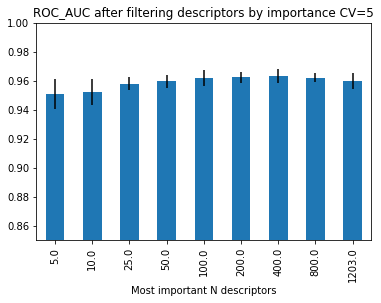

In [16]:
clf.fit(X_train_rf, y_train_rf)
optimiseImportance(clf, X_train_rf, y_train_rf)

### Remove labels 

In [17]:
clf.fit(X_train_rf, y_train_rf)
X_train_rf, X_test_rf, clf = handle_importance(clf, 
                                               X_train_rf, 
                                               X_test_rf, 
                                               threshold=-1, 
                                               n=200)

In [19]:
clf.fit(X_train_rf, y_train_rf)
print("Performance of Random Forest after removing labels")
test_model_cross_val(clf, y_train_rf, X_train_rf, k=5, verbose=True)

Performance of Random Forest after removing labels
AVERAGE CV=5 ROC_AUC (TEST): 0.9621902700474129
AVERAGE CV=5 STD (TEST): 0.003997208283330041


In [20]:
X_train_rf

,FNSA2,TopoPSA_NO_,SM1_Dzse,GRAV,SM1_Dzi,ATSC0se,WNSA4,PNSA4,SM1_Dzm,ATS2dv,...,Mm,bpol,Mor29se,ATSC1m,AATSC1v,ATS4se,SsF,BCUTse_1h,Mor32m,Mor11p
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],-0.767715,80.44,1.134242,2042.071181,0.917786,2.972664,-4.732438,-14.619011,1.139562,282.000000,...,0.818465,7.050035,0.072368,-10.560182,2.951109,259.287336,0.000000,3.756942,0.022426,0.187321
CCCCCCCCCCCCCCCCO,-0.164160,20.23,0.248495,1704.627767,0.173134,1.263522,-1.250653,-2.006400,0.249266,64.000000,...,0.395792,34.109038,-1.550002,-67.604542,-1.473857,906.922380,0.000000,3.667348,-0.183097,0.962906
C1(C(O1)(F)F)(C(F)(F)F)F,-1.270169,12.53,2.129495,2387.169619,2.295353,3.149698,-8.671861,-33.188443,2.455999,558.000000,...,1.382253,8.414000,-0.061163,-18.309873,-2.905991,96.000000,67.828125,4.032215,-0.304333,0.187299
CC(C)(C=C)O,-0.209484,20.23,0.248495,595.110492,0.173134,1.036660,-0.881495,-3.397234,0.249266,40.000000,...,0.448204,10.032070,-0.345942,-61.374409,-4.272259,245.042496,0.000000,3.667789,-0.069604,-0.164118
C=CCC1=CC2=C(C=C1)OCO2,-0.491671,18.46,0.496990,1869.582493,0.346268,1.882625,-2.784297,-7.888307,0.498531,237.000000,...,0.613786,13.504070,-0.138133,58.517848,-1.401968,314.117584,0.000000,3.689669,-0.090105,0.412846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCS,-0.112203,0.00,0.071356,441.365151,-0.086900,0.163932,-0.549242,-2.026929,0.625359,7.111111,...,0.500563,12.492070,-0.441625,-136.315344,-8.230659,146.776370,0.000000,3.012599,-0.074384,-0.306488
CCN(CC)CC,-0.084435,3.24,0.140263,688.729833,0.225250,0.398851,-0.342869,-1.147137,0.142500,27.000000,...,0.382956,16.758105,-0.751829,-25.341655,-10.167063,316.772076,0.000000,3.256310,0.129538,-0.374363
C1=CC=C(C=C1)C(=O)C2=CC=CC=C2,-0.401193,17.07,0.248495,2168.780768,0.173134,1.044981,-2.325509,-6.234910,0.249266,232.000000,...,0.632136,10.900070,0.049585,19.522406,1.688089,335.290456,0.000000,3.701425,-0.279856,0.492693


ROC_AUC (TEST): 0.9645528455284553


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.86      0.86      0.86        50
        True       0.94      0.94      0.94       123

    accuracy                           0.92       173
   macro avg       0.90      0.90      0.90       173
weighted avg       0.92      0.92      0.92       173



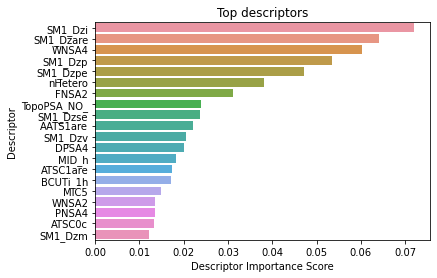

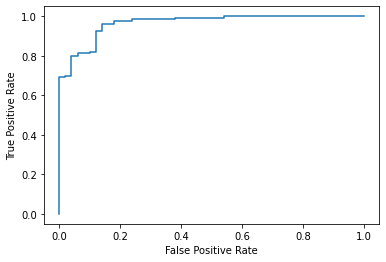

0.9645528455284553

In [23]:
tuned_rf = clf
clf.fit(X_train_rf, y_train_rf)
test_model(clf, y_test_rf, X_test_rf)

# XgBoost

https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost

In [28]:
# for readibility 
y_train_xgb = y_train
y_test_xgb = y_test
X_train_xgb = X_train
X_test_xgb = X_test

## Create model

In [22]:
X_train_xgb.columns = X_train_xgb.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
X_test_xgb.columns = X_test_xgb.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

xgb = XGBClassifier(random_state=SEED, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [24]:
# Baseline results
print("Baseline performance of XGBoost")
test_model_cross_val(xgb, y_train_xgb, X_train_xgb, k=5, verbose=True)

Baseline performance of XGBoost
AVERAGE CV=5 ROC_AUC (TEST): 0.9718527107812822
AVERAGE CV=5 STD (TEST): 0.002209356733547389


## Handle NaNs

Cross validated missing values experiment with k=5


,Name,Average ROC_AUC,Standard Deviation
0,0.0,0.972203,0.003786
1,0.1,0.969462,0.002598
2,0.2,0.968799,0.002158
3,0.3,0.969414,0.002781
4,0.4,0.969968,0.002667
5,0.5,0.970380,0.003200
6,0.6,0.970027,0.003396
7,0.7,0.969561,0.004030
8,0.8,0.970274,0.003384
9,0.9,0.970074,0.003757


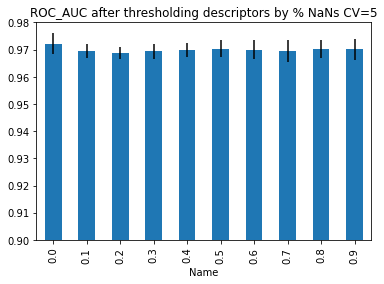

In [25]:
# choose optimal threshold for removing columns with NaNs
optimiseNaNs(xgb, X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb, option=2)

Choose to remove columns with NaNs > 0.7

In [29]:
X_train_xgb, X_test_xgb = handleNaNs(X_train_xgb.copy(), X_test_xgb.copy(), option=1)

In [30]:
xgb.fit(X_train_xgb, y_train_xgb)
test_model_cross_val(xgb, y_train_xgb, X_train_xgb, k=5, verbose=True)

AVERAGE CV=5 ROC_AUC (TEST): 0.97220263863121
AVERAGE CV=5 STD (TEST): 0.003786424148223389


## Importance Experiment XGB

Cross validated importance experiment with k=5
N:5
N:10
N:25
N:50
N:100
N:200
N:400
N:800
N:1203


,Most important N descriptors,Average ROC_AUC,Standard Deviation
0,5.0,0.963281,0.008521
1,10.0,0.975987,0.005680
2,25.0,0.976162,0.004318
3,50.0,0.978462,0.002379
4,100.0,0.978369,0.004433
5,200.0,0.978002,0.003149
6,400.0,0.974337,0.003841
7,800.0,0.973116,0.004049
8,1203.0,0.973470,0.003628


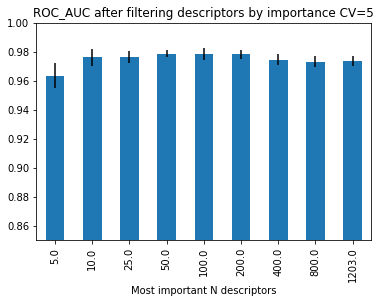

In [31]:
optimiseImportance(xgb, X_train_xgb, y_train_xgb)

In [32]:
X_train_xgb, X_test_xgb, xgb = handle_importance(xgb, 
                                                X_train_xgb, 
                                                X_test_xgb, 
                                                threshold=-1, 
                                                n=100)

# Filted importance results
xgb.fit(X_train_xgb, y_train_xgb)
test_model_cross_val(xgb, y_train_xgb, X_train_xgb, k=5, verbose=True)

AVERAGE CV=5 ROC_AUC (TEST): 0.9783694083694083
AVERAGE CV=5 STD (TEST): 0.004432543433170324


In [33]:
tuned_xgb = xgb

ROC_AUC (TEST): 0.971869918699187


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.92      0.90      0.91        50
        True       0.96      0.97      0.96       123

    accuracy                           0.95       173
   macro avg       0.94      0.93      0.94       173
weighted avg       0.95      0.95      0.95       173



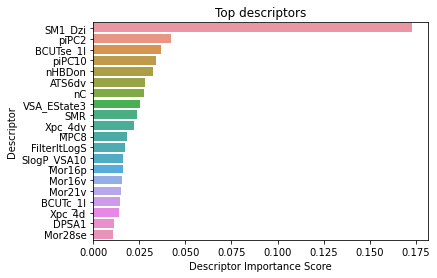

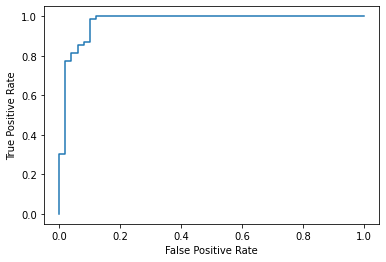

0.971869918699187

In [34]:
tuned_xgb.fit(X_train_xgb, y_train_xgb)
test_model(tuned_xgb, y_test_xgb, X_test_xgb)